
# Week 04 - Investigate relations & structures

This week we have a set of exercises to give you some hands on experience for investigating relations and dependencies between different phenomena. We will again make use of different data sets an available functionality in pandas and numpy. This week is mostly in DIY fashion where you will need to carry on different analytical tasks.

Data: Crime vs. Socio-economic indicators
For this week's exercises, we will be analysing a data set made available by the UCI Machine Learning Repository, which is a good resource to find example data sets. The data, Communities in the US., combines socio-economic data from the '90 Census, law enforcement data from the 1990 Law Enforcement Management and Admin Stats survey, and crime data from the 1995 FBI UCR. We provide two versions of the data, a problematic one with some missing values, and a clean version where the problematic columns have been removed. Detailed information on column names can be found here. The reason this data set has been collected is to find the relations between crime statistics and socio-economic variables. Before you continue with practicals:

Have a look at the meta-data (for the problematic version).
Identify the dependent and independent variables in the data.

# DIY Exercises - 1 : Correlation Analysis
Here we investigate how we can perform correlation analysis using Python. Pandas has functionalities to do some correlation analysis, but we start with a numpy version of the analysis.

1. Load the Communities in the US (cleaned version) into a pandas data frame. Use this as an example:

In [59]:
from pathlib import Path
file_name = 'censusCrimeClean.csv'
fname = Path(file_name)

if not fname.is_file():
    # download
    try:
        import urllib.request
        url = 'http://staff.city.ac.uk/~sbbk529/Teaching/Resources/INM430/censusCrimeClean.csv' # retrieved 17.10.2018
        
        urllib.request.urlretrieve(url, file_name)
        fname = Path(file_name)
    except ValueError:
        print("Could not download censusCrimeClean.csv")

In [60]:
import csv as csv
import numpy as np
import pandas as pd

crimedata = pd.read_csv(file_name)
print (crimedata.head()) # check if everything is in place

         communityname  fold  population  householdsize  racepctblack  \
0         Lakewoodcity     1        0.19           0.33          0.02   
1          Tukwilacity     1        0.00           0.16          0.12   
2         Aberdeentown     1        0.00           0.42          0.49   
3  Willingborotownship     1        0.04           0.77          1.00   
4    Bethlehemtownship     1        0.01           0.55          0.02   

   racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  \
0          0.90          0.12         0.17         0.34         0.47   
1          0.74          0.45         0.07         0.26         0.59   
2          0.56          0.17         0.04         0.39         0.47   
3          0.08          0.12         0.10         0.51         0.50   
4          0.95          0.09         0.05         0.38         0.38   

          ...           NumStreet  PctForeignBorn  PctBornSameState  \
0         ...                 0.0            0.12        

2. Copy one of the dependent and one of the independent columns into separate numpy arrays. You can use as_matrix function in pandas. You can choose any but an interesting one could be to look at the relation between "medIncome" and "ViolentCrimesPerPop". Remember to use numpy slicing you learnt earlier.

Dependend and independent variables https://en.wikipedia.org/wiki/Dependent_and_independent_variables retrieved 17.10.2018

"In mathematical modeling, statistical modeling and experimental sciences, the values of dependent variables depend on the values of independent variables. The dependent variables represent the output or outcome whose variation is being studied. The independent variables, also known in a statistical context as regressors, represent inputs or causes, that is, potential reasons for variation. In an experiment, any variable that the experimenter manipulates can be called an independent variable. Models and experiments test the effects that the independent variables have on the dependent variables. Sometimes, even if their influence if not of direct interest, independent variables may be included for other reasons, such as to account for their potential confounding effect."

Assuming 'ViolentCrimesPerPop' and 'medIncome' are the dependent and independent values respectively.

In [61]:
nparr = np.array(crimedata[['medIncome', 'ViolentCrimesPerPop']].values)
# Note syntax, get first row
nparr[0]
# array([0.37, 0.2 ])
# Show how many rows and colummns in array
nparr.shape
# (1994, 2)
# Get all values in column 1
nparr[:,0]
# array([0.37, 0.31, 0.3 , ..., 0.31, 0.44, 0.4 ])
# Get all values in column 2
nparr[:,1]
# array([0.2 , 0.67, 0.43, ..., 0.23, 0.19, 0.48])


array([0.2 , 0.67, 0.43, ..., 0.23, 0.19, 0.48])

3. Perform a Pearson correlation and note the correlation value.

NB Slide 33 in https://moodle.city.ac.uk/pluginfile.php/1524168/mod_resource/content/0/INM430_Week04_Lecture.pdf retrieved 17.10.2018 refers to "Pearson Correlation" though corresponding formula in wikipedia refers to "pearson correlation coeficient"

From https://en.wikipedia.org/wiki/Pearson_correlation_coefficient retrieved 17.10.2018    

**Definition**
  
"Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations. The form of the definition involves a "product moment", that is, the mean (the first moment about the origin) of the product of the mean-adjusted random variables; hence the modifier product-moment in the name."

$$r = r_{xy} =\frac{1}{n-1} \sum ^n _{i=1} \left( \frac{x_i - \bar{x}}{s_x} \right) \left( \frac{y_i - \bar{y}}{s_y} \right)$$

In [23]:
import scipy.stats as scp
scp.pearsonr(nparr[:,0], nparr[:,1])

(-0.42422061672612604, 6.334424808052866e-88)

4. Perform a Spearman correlation computation and note the correlation value.

In [24]:
scp.spearmanr(nparr[:,0], nparr[:,1])

SpearmanrResult(correlation=-0.482169950997556, pvalue=1.2978853095169542e-116)

5. Comment on the differences / similarities in relation to a scatterplot visualisation of the two columns.

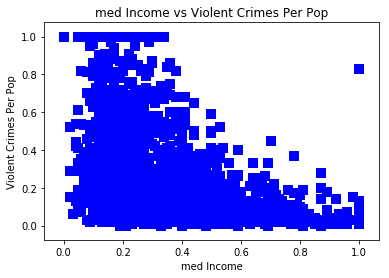

In [68]:
import matplotlib.pyplot as plt
# pass as array
plt.scatter(crimedata['medIncome'],crimedata['ViolentCrimesPerPop'], c = 'Blue', s = 100, linewidth = 0, marker='s')
plt.title("med Income vs Violent Crimes Per Pop")
plt.xlabel("med Income")
plt.ylabel("Violent Crimes Per Pop")
plt.show()

Violent crime and median income seem to be invertionally proportional

# DIY Exercises - 2 : Regression Analysis
Here we investigate how we can perform correlation analysis using Python, scipy and statsmodels. Alternatively, you can use statsmodels in combination with Pandas. Now on to some exercises:

1. We first start with scipy. Use the basic functionality from scipy to perform a simple linear regression. Get two columns from the data into numpy arrays and use the scipy.stats.linregress function to perform a linear regression. Comment on the results returned.

2. Although statsmodels can operate in coordination with pandas, we will first use statsmodels with numpy arrays. Start by getting the data into numpy arrays first. Basic functionality in scipy was limited and multiple regression was not possible. 

3. Now select 2 independent variables and a single dependent variable. Use the OLS function in statsmodels to perform a multiple regression operation and comment on the results. Note that you first model and fit the model to your data:

In [45]:
epm = 40800 / 52 / 37.5
print(epm)

20.923076923076923


In [42]:
epm * 100

2.328767123287671

In [ ]:
epm * 3600